In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import os

Image path:
Number of clusters (> 0):
Init centroids (0: random, 1: in pixels):
Image format (0: png, 1: pdf):


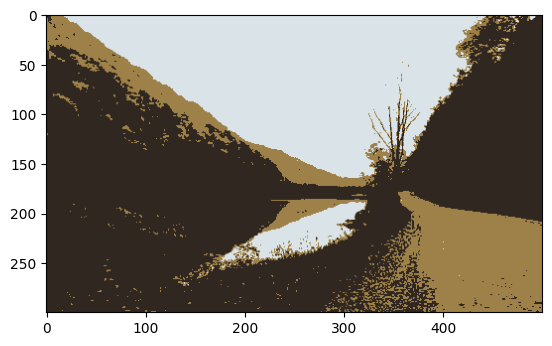

In [2]:
def img_1d_generate(input):
  return input.reshape((-1, input.shape[2]))

def euclidean_distance(px, centroids):
  return np.sqrt(np.sum((px - centroids)**2, axis=1))

def kmeans(img_1d, k, init_centroids, max_iter=10):
  if init_centroids == 0:
    centroids = np.random.randint(266, size=(k, len(img_1d[0])))
  else:
    unique = np.unique(img_1d, axis=0)
    centroids = unique[np.random.randint(len(unique), size=k), :]

  for _ in range(max_iter):
    img_cluster = []

    for px in img_1d:
      px_distances = euclidean_distance(px, centroids)
      img_cluster.append(np.argmin(px_distances))

    img_cluster = np.array(img_cluster)

    img_cluster_id = []

    for i in range(k):
      img_cluster_id.append(np.argwhere(img_cluster == i))

    cluster_centers = []

    for i, id in enumerate(img_cluster_id):
      if len(id) == 0:
        cluster_centers.append(centroids[i])
      else:
        cluster_centers.append(np.mean(img_1d[id], axis=0, dtype=int)[0])

    if np.max(abs(centroids - np.array(cluster_centers))) < 10:
      break
    else:
      centroids = np.array(cluster_centers)

  return centroids, img_cluster

def main():
  print("Image path:")
  img_path = input()
  img = np.array(PIL.Image.open(img_path))
  print("Number of clusters (> 0):")
  k = int(input())
  print("Init centroids (0: random, 1: in pixels):")
  init_centroids = int(input())
  print("Image format (0: png, 1: pdf):")
  format_input = int(input())

  if k > 0 and init_centroids in range(0, 2) and format_input in range(0, 2):  
    img_1d = img_1d_generate(img)
    centroids, img_cluster = kmeans(img_1d, k, init_centroids)
    new_img = []
    for id in img_cluster:
      new_img.append(centroids[id])

    img_name = img_path.split('/')
    img_format = "png" if format_input == 0 else "pdf"
    new_img_name = img_name[-1].split('.')[0] + "." + img_format
    if not os.path.exists("./output"):
      os.makedirs("./output") 
    
    res = PIL.Image.fromarray(np.reshape(new_img, img.shape).astype(np.uint8))
    res.save(f"./output/{new_img_name}")
    plt.imshow(np.reshape(new_img, img.shape))
  else:
    print("Invalid input")

main()